# Applied Statistics - Tasks Overview

This task will enable you to have a hands-on experience on how Applied Statistics is used in a practical Data Science process. This will provide and equip you with some of the basic knowledge of proving a finding/insight through scientific methods so that executives are rest-assured that our findings are correct and to be used for data-driven decision making.

You have two sets of tasks for this course. These tasks are guided for you and you need to create a presentation for this so as to prepare for future Data Science and Analytics projects.
1. The first task involves you proving a finding in a medical field through the use of a basic dataset called as the Wisconsin Breast Cancer Dataset. You will have to do the following:
    * Provide descriptive statistics of the different columns/features in relation to each other. 
    * Provide data visualization graphs to highlight useful insights
    * Through hypothesis testing, answer the question below:
        * Do those with 'malignant' tumors have a bigger 'mean area' on average than those with 'benign' tumors?
2. The second task involves you analyzing one of the most famous datasets for analysis called as the Titanic Dataset. For this dataset you have to use hypothesis testing to answer the questions below:
    * Test whether the survival rate of first-class passengers is higer than 50% chance.
    * Test whether the average fare price of the survivors are higher than those who did not survive

For the second task, a hint can be provided that some of these were used as examples in our lecture and you just have to justify your findings during the presentation. Don't worry, your mentors will guide you in the process.

In [2]:
# Preliminaries:
import random
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import statsmodels as sm
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import norm as gaussian
%matplotlib inline

## Task 1: The Wisconsin Breast Cancer Dataset

In [3]:
## Start at this point on your descriptive statistics and analysis
bcancer = datasets.load_breast_cancer()
bcancer_df = pd.DataFrame(data=bcancer.data, columns=bcancer.feature_names)


g = sns.FacetGrid(data = bcancer_df.melt(var_name='Variables', value_name='Values'), col = 'Variables', col_wrap = 5, sharey = False, sharex = False)
g = g.map(plt.hist, "Values", edgecolor = 'white', bins = 30)

In [4]:
bcancer_df.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.400000   251.20000  
worst area               515.300000  686.500000  1084.

### Hypothesis Testing Task1:
#### Do those with 'malignant' tumors have a bigger 'mean area' on average than those with 'benign' tumors?

In [6]:
# 2. Get the Wisconsin Breast Cancer dataset
bcancer = datasets.load_breast_cancer()
bcancer_df = pd.DataFrame(data=bcancer.data, columns=bcancer.feature_names)
# Add the outcome / target variable (malignant or benign)

bcancer_df = bcancer_df.assign(target=pd.Series(bcancer.target))
bcancer_df.replace(to_replace={'target': {0: bcancer.target_names[0]}}, inplace=True)
bcancer_df.replace(to_replace={'target': {1: bcancer.target_names[1]}}, inplace=True)
bcancer_df["target"] = bcancer_df["target"].astype("category")
bcancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension     target  
0          0.4601                  0.11890  malignant  
1          0.2750                  0.08902  malignant  
2          0.3613                  0.08758  malignant  
3          0.6638                  0.17300  malignant  
4          0.2364                  0.07678  malignant  

[5 rows x 31 columns]

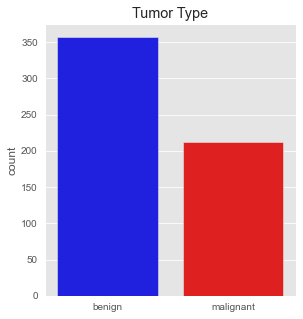

In [29]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(4.5,5))
ax = sns.countplot(data = bcancer_df, x = "target", palette = ['blue','red'])
ax.set_title("Tumor Type")
ax.set_xlabel("")
plt.show()
# save fig
fig = ax.get_figure()
fig.savefig('count_cancer.png')

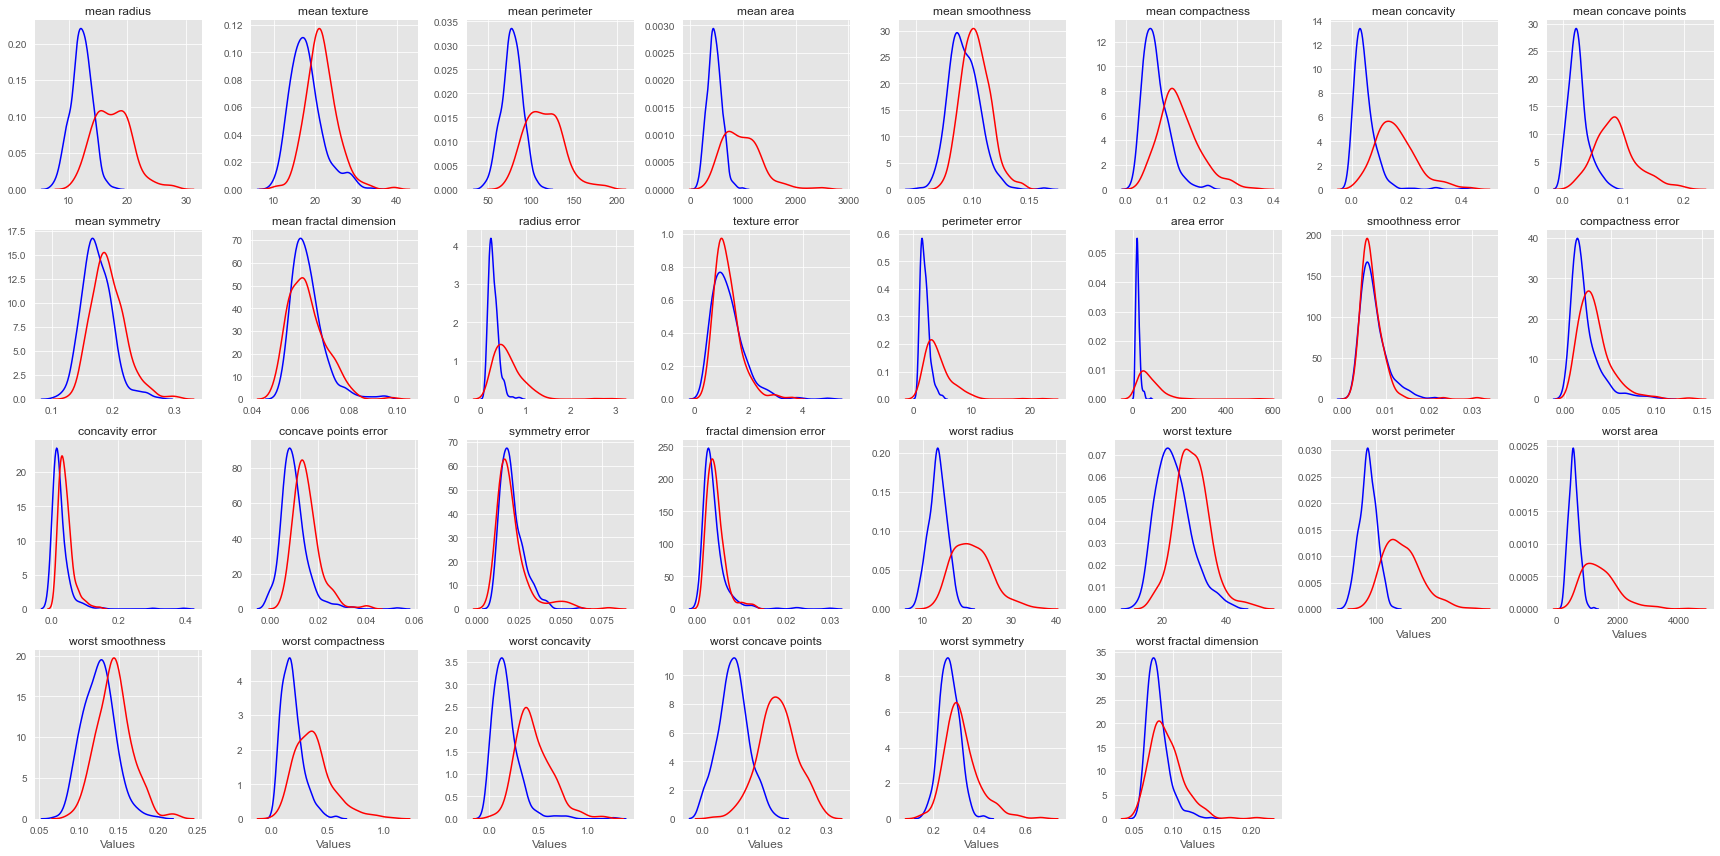

In [53]:
#fig, ax = plt.subplots()
ax = sns.FacetGrid(data = bcancer_df.melt(id_vars = "target" ,var_name='Variables', value_name='Values'), col = 'Variables', hue = "target", palette = ['blue', 'red'], col_wrap = 8, sharey = False, sharex = False)
ax = ax.map(sns.kdeplot, "Values")
ax.set_titles(col_template = "{col_name}")
plt.show()
ax.savefig('EDA.png')

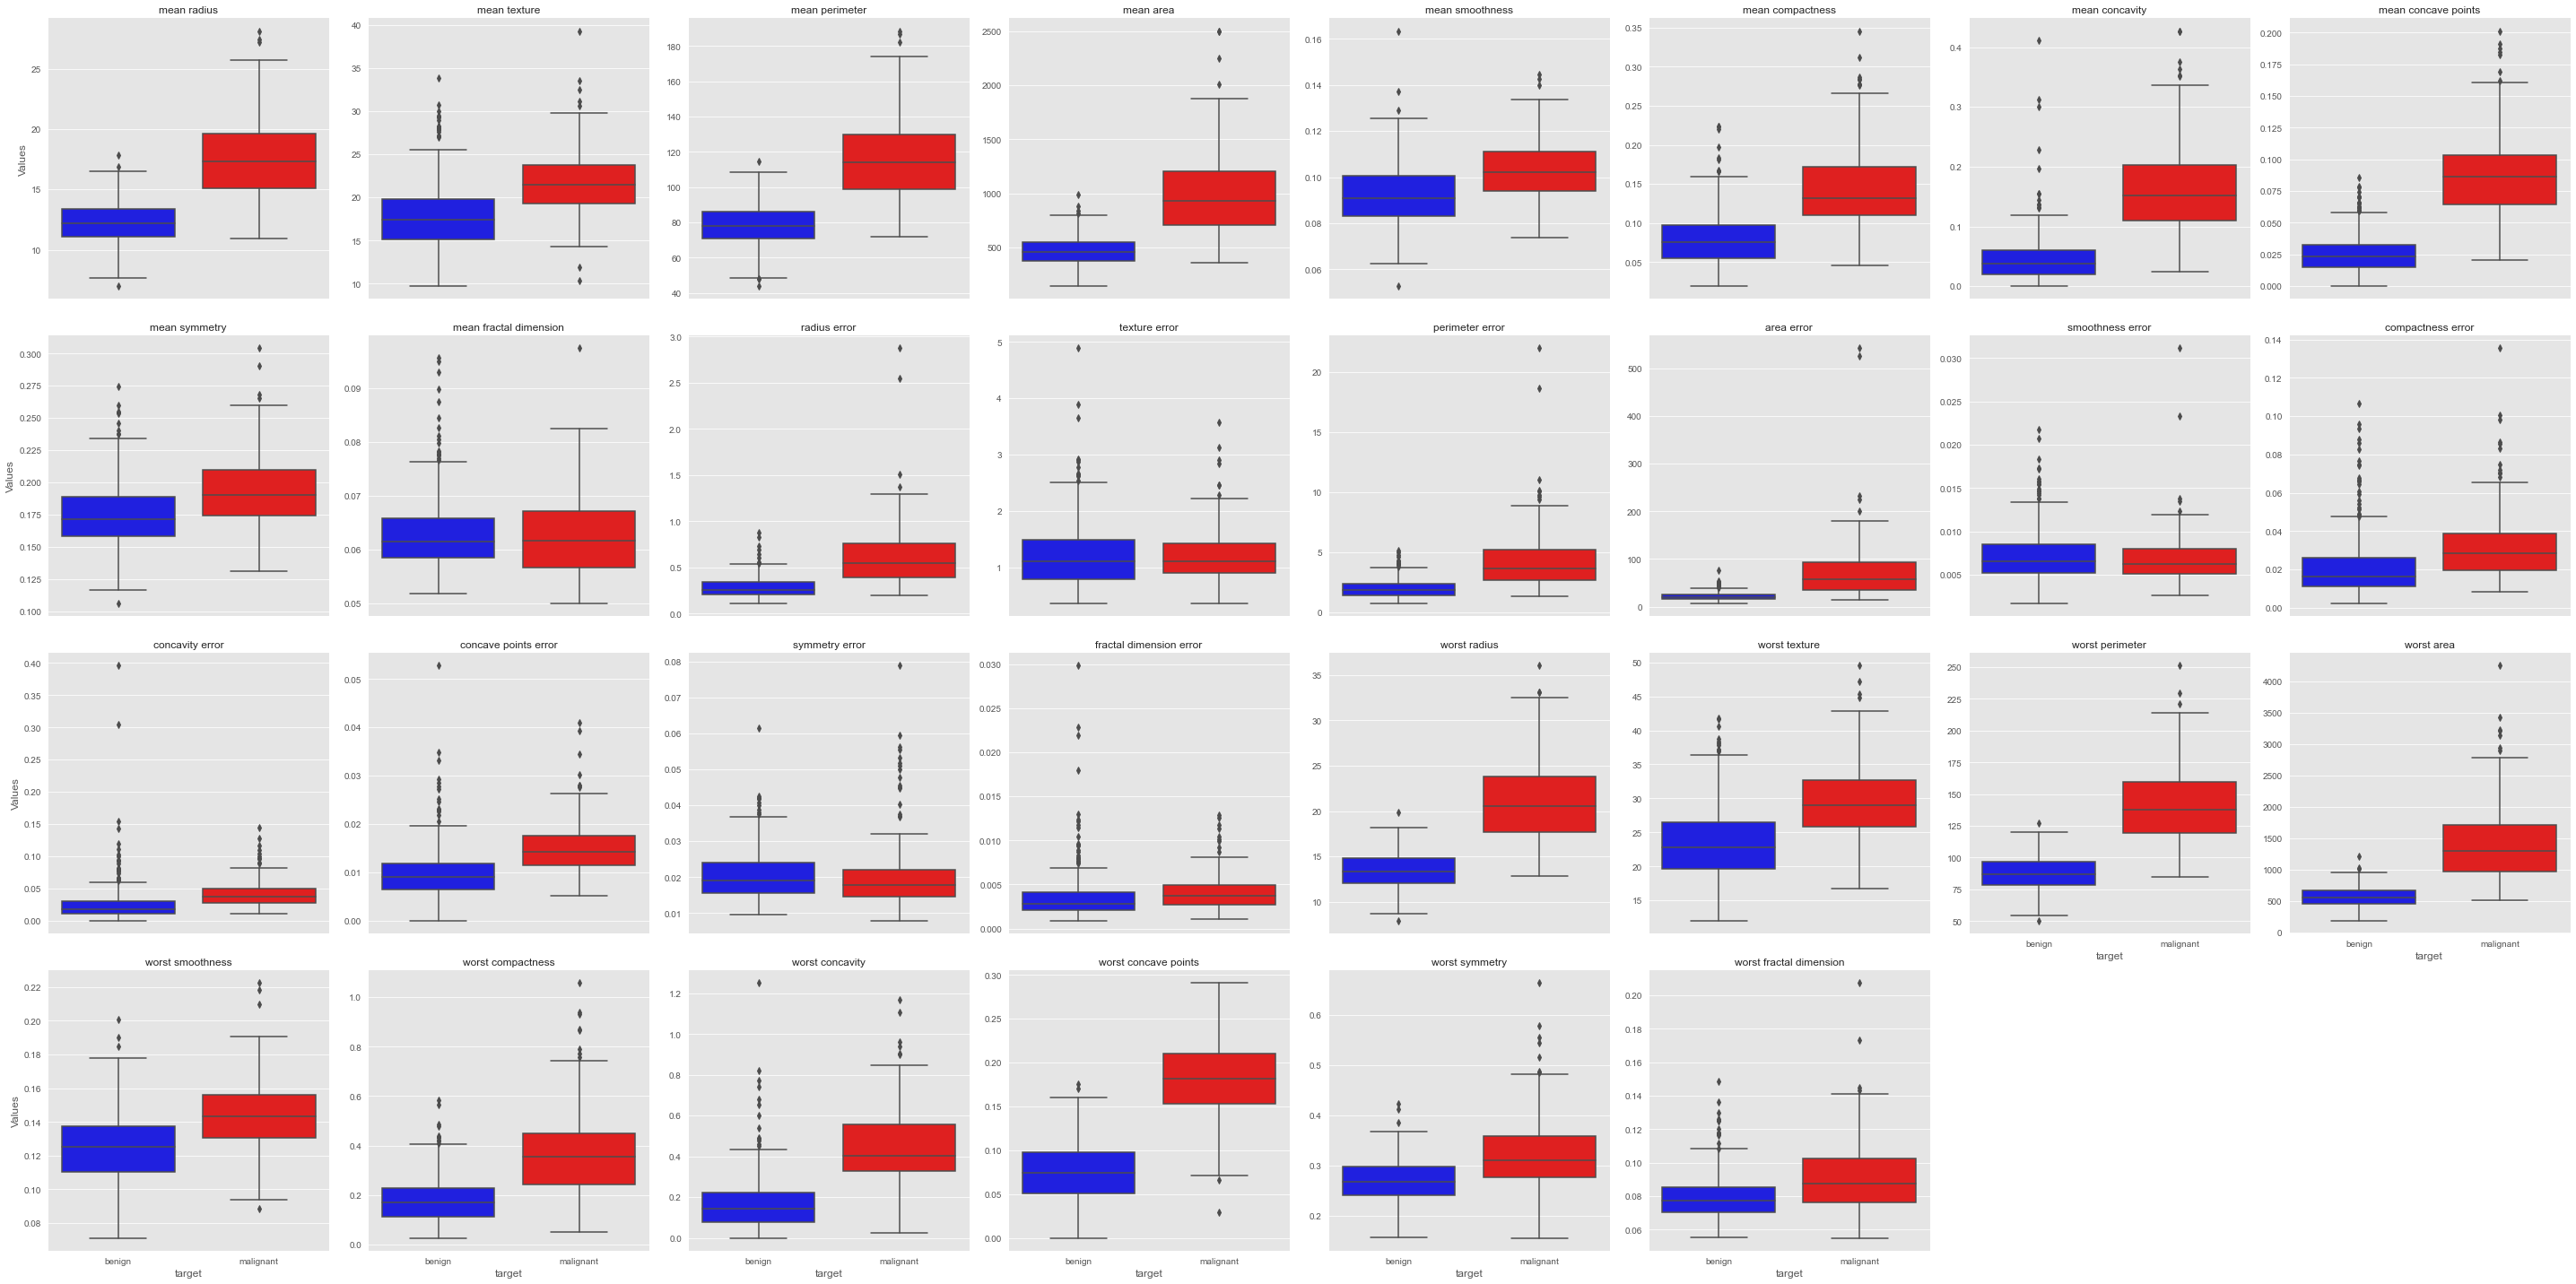

In [69]:
ax = sns.catplot(
    data=bcancer_df.melt(id_vars = "target" ,var_name='Variables', value_name='Values'), 
    x='target', y='Values',
    col='Variables', kind='box', col_wrap=8,
    sharey = False, palette = ['blue', 'red']
)
ax.set_titles(col_template = "{col_name}")
plt.tight_layout()
plt.show()
ax.savefig('EDA2.png')

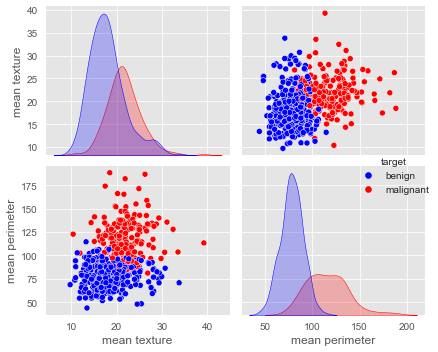

In [76]:
ax = sns.pairplot(bcancer_df[['mean texture', 'mean perimeter', 'target']],hue='target',palette=['blue', 'red'])
plt.tight_layout()
plt.show()
ax.savefig('corr.png')

In [83]:
bcancer_df[bcancer_df['target'] == 'malignant'][['mean texture', 'mean perimeter']].corr()

mean texture  mean perimeter
mean texture        1.000000        0.110682
mean perimeter      0.110682        1.000000

For this approach, we are comparing two population means (mean area of those with malignant tumors than those with benign tumors). For this problem, it is noteworthy that these population means are ***unpaired*** meaning they are from different populations. We also assume that our dataset is large enough so as to assume that the distribution is normal in order for the Central Limit Theorem to take hold.

We then follow the next rules for this assumptions:

**Required Quantities.** As preliminaries, we compute / hypothesize the following quantities.
* The sample sizes of each: $N_1$ and $N_2$.
* The hypothesized / baseline mean difference in populations: $ \delta_{12} = \mu_1 - \mu_2$.
    * If our null hypothesis is that *there's no difference between the two population means*, this quantity is **zero**.
* The sample estimates for each mean difference: $\bar{x_1}$ and $\bar{x_2}$.
* The **sample standard deviations** for each sample: $s_1$ and $s_2$.
* The *pooled standard error*: <br>
$S = \sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}$
    * In the case where the two samples are independent, but have the same standard deviation and sample size, this reduces to the usual $\frac{s}{\sqrt{N}}$.
* The square of the standard error for each sample: <br>
$V_1 = \frac{s_1^2}{N_1}$ <br>
$V_2 = \frac{s_2^2}{N_2}$
* The degrees of freedom: <br>
$df = \frac{(V_1 + V_2)^2}{\frac{V_1^2}{N_1 - 1} + \frac{V_2^2}{N_2 - 1}}$

**Test statistic.** Assuming a true $H_0$, our test statistic, $t$, approximately follows Student's $t$-distribution (same as in Scenario 2) with $df$ degrees of freedom (rounded down), and is given by:

$t = \frac{(\bar{x_1} - \bar{x_2}) - \delta_{12}}{S}$

Let us first establish our Null and Alternative Hypotheses for this task:
* H0 = The mean area of those with malignant tumors does not have a difference than those who have benign tumors on average
* Ha = Those with malignat tumors have a larger 'mean area' on average than those with 'benign' tumors

In [70]:
def get_proper_pvalue(test_statistic, test_tailedness, pval_2tailed):
    '''
        Calculate the proper one-tailed p-value (for a one-tailed test, 
        either left-tailed or right-tailed), based on the two-tailed 
        p-value and the sign of the test statistic.
        
        This function returns half of `pval_2tailed` if the sign of `test_statistic` 
        is consistent with the specified `test_tailedness`, and `1.0 - 0.5 * pval_2tailed`
        if the two have opposing signs. A `test_statistic` equal to `0` lies exactly
        at the midpoint of the null distribution anyway, so `0.5` is returned in this 
        particular scenario.
        
        This is designed to work only with the test functions provided by
        SciPy with return a two-tailed p-value according to their
        documentation pages.
        
        Parameters:
            `test_statistic` : `float`
                The calculated test statistic.
            `test_tailedness` : `{"less", "greater"}`
                A string indicating whether the test is a left-tailed test (`"less"`)
                or a right-tailed test (`"greater"`).
            `pval_2tailed` : `float`
                The two-tailed p-value reported by a hypothesis-testing function.
                Please check the function's documentation to determine whether it
                reports a one-tailed or a two-tailed p-value.
        
        Returns:
            `pval_1tailed` : `float`
                The proper one-tailed p-value to use with your one-tailed hypothesis test.
    '''
    # Check if specified test_tailedness is only from the permissible set {"less", "greater"}
    if test_tailedness not in {"less", "greater"}:
        raise ValueError("Specified tail of test must either be 'less' (left-tailed) or 'greater' (right-tailed).")
    
    # Now that's out of the way:
    if test_statistic == 0.0:
        pval_1tailed = 0.5
    if (test_statistic > 0.0 and test_tailedness == "greater") or (test_statistic < 0.0 and test_tailedness == "less"):
        pval_1tailed = 0.5 * pval_2tailed
    if (test_statistic < 0.0 and test_tailedness == "greater") or (test_statistic > 0.0 and test_tailedness == "less"):
        pval_1tailed = 1.0 - 0.5 * pval_2tailed
    return pval_1tailed

Provide the following codes here:

In [84]:
benign_meanarea = list(bcancer_df[bcancer_df["target"] == "benign"]["mean area"]) # 2
malignant_meanarea = list(bcancer_df[bcancer_df["target"] == "malignant"]["mean area"]) # 1

# Define required quantities
alpha = 0.05
N1 = len(malignant_meanarea)
N2 = len(benign_meanarea)
x1 = np.mean(malignant_meanarea)
x2 = np.mean(benign_meanarea)
s1 = np.std(malignant_meanarea)
s2 = np.std(benign_meanarea)
V1 = s1*s1/N1
V2 = s2*s2/N2
S = np.sqrt(V1 + V2)
df = int((V1 + V2)**2 / (V1**2 / (N1 - 1) + V2**2 / (N2 - 1)))
delta_12 = 0.0

# Compute and display test statistic
t_stat = (x1 - x2 - delta_12) / S
print ("Test statistic: ", t_stat)

Test statistic:  19.686088928835698


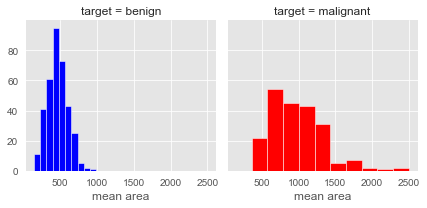

In [85]:
# Plot the histograms of the two classes here in this cell
g = sns.FacetGrid(data = bcancer_df, col = 'target', hue = 'target', sharey = True, sharex = True, palette = ['blue', 'red'])
g = g.map(plt.hist, "mean area", edgecolor = 'white')
g.savefig('mean_area.png')

In [86]:
from scipy.stats import t
# Calculate the p-value using the t-distribution's survival function.
# We're using SF since we're dealing with a right-tailed test
p_value = t.sf(t_stat, df=df)

# Calculate the critical value of the test statistic for a right-tailed test
t_stat_crit = t.isf(alpha, df=df)
print ("Test statistic: ", t_stat)
print("p-value (right-tailed): ", p_value)
print("Critical value of t: ", t_stat_crit)
if p_value < alpha:
    print (r"Reject the Null Hypothesis (alpha = %s)."%(alpha,))
else:
    print (r"Fail to Reject the Null Hypothesis (alpha = %s)."%(alpha,))

Test statistic:  19.686088928835698
p-value (right-tailed):  1.3310210316734e-52
Critical value of t:  1.6511225047896378
Reject the Null Hypothesis (alpha = 0.05).


From the task above what is the final result? Explain in detail during presentation

## Task 2: The Titanic Dataset

* Test whether the survival rate of first-class passengers is higer than 50% chance.
* Test whether the average fare price of the survivors are higher than those who did not survive

### Test whether the survival rate of first-class passengers is higer than 50% chance.

For the first bullet, since we are observing a fraction/group from the population (first-class passengers), we can assume a large enough sample size in order for the binomial distribution to be approximated by the standard normal (or Gaussian) distribution.

**Null and Alternative Hypotheses.** The null and alternative hypotheses are the ff:

Let $Q$ be the fraction of the population having the property of interest, and $q$ be its hypothesized value under the null hypothesis. Then:

One-sided:  
$H_0 : Q \leq q$   
$H_A : Q > q$

Two-sided:   
$H_0 : Q = q$   
$H_A : Q \neq q$ 

**Test Statistic.** Let $N$ be the sample size, $N_q$ the number in our sample with the property of interest, and $q$ the hypothesized population fraction. We need the following quantities:

$\hat{q} = \frac{N_q}{N}$ <br>
$\sigma_{\hat{q}} = \sqrt{\frac{q(1 - q)}{n}} $ 

The test statistic, $z$, approximately obeys the Gaussian distribution for large samples, and is given by:

$z = \frac{\hat{q} - q}{\sigma_{\hat{q}}}$

The p-value is then calculated using the Gaussian distribution and the test statistic.

Our alpha is 0.05 for this

In [56]:
dataset = sns.load_dataset("titanic")
dataset.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

Establishing our Null and Alternative Hypotheses
* Ho = The survival rate of first class passengers is lower than or equal 50%

* Ha = The survival rate of first class passengers is higher than 50%

In [51]:
survived_first = dataset[(dataset['class']=='First') & (dataset['survived'] == 1)]
notsurvived_first = dataset[(dataset['class']=='First') & (dataset['survived'] == 0)]

In [54]:
# test statistic assuming q = 0.5 since 50% chance given:
q = 0.5

# Specify the following codes
N = survived_first.shape[0] + notsurvived_first.shape[0]
q_hat = survived_first.shape[0] / notsurvived_first.shape[0]
se_qhat = np.sqrt(q * (1.0 - q) / N)
z_score = (q_hat -q) / se_qhat



# Calculate the p-value using the survival function of the Gaussian distribution:
p_1side = gaussian.sf(z_score)
print (p_1side)

# Compare it with the p-value of 0.05 and state your findings here
print("p-value (right-tailed): ", p_1side)
if p_1side < alpha:
    print (r"Reject the Null Hypothesis (alpha = %s)."%(alpha,))
else:
    print (r"Fail to Reject the Null Hypothesis (alpha = %s)."%(alpha,))


7.712803703301634e-273
p-value (right-tailed):  7.712803703301634e-273
Reject the Null Hypothesis (alpha = 0.05).


<AxesSubplot:xlabel='survived', ylabel='count'>

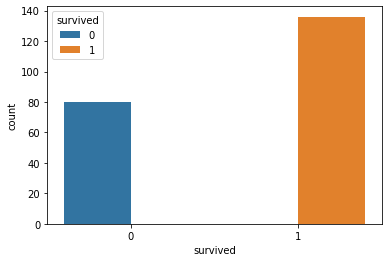

In [62]:
sns.countplot(data = dataset[dataset['class']=='First'], x = "survived", hue = "survived")


### Test whether the average fare price of the survivors are higher than those who did not survive

For this task, use hypothesis testing to prove the alternative hypothesis or null hypothesis.
Hint: Same procedure as those in the first task

In [43]:
survived_first = list(dataset[(dataset['class']=='First') & (dataset['survived'] == 1)]["fare"])
notsurvived_first = list(dataset[(dataset['class']=='First') & (dataset['survived'] == 0)]["fare"])

In [47]:
survived_first = list(dataset[(dataset['class']=='First') & (dataset['survived'] == 1)]["fare"])
notsurvived_first = list(dataset[(dataset['class']=='First') & (dataset['survived'] == 0)]["fare"])

# Define required quantities
alpha = 0.05
N1 = len(survived_first)
N2 = len(notsurvived_first)
x1 = np.mean(survived_first)
x2 = np.mean(notsurvived_first)
s1 = np.std(survived_first)
s2 = np.std(notsurvived_first)
V1 = s1*s1/N1
V2 = s2*s2/N2
S = np.sqrt(V1 + V2)
df = int((V1 + V2)**2 / (V1**2 / (N1 - 1) + V2**2 / (N2 - 1)))
delta_12 = 0.0

# Compute and display test statistic
t_stat = (x1 - x2 - delta_12) / S
print ("Test statistic: ", t_stat)

Test statistic:  3.115630119048038


In [48]:
# Plot the histograms of the two classes here in this cell
g = sns.FacetGrid(data = dataset[dataset['class']=='First'], col = 'survived', hue = 'survived', sharey = True, sharex = True)
g = g.map(plt.hist, "fare", edgecolor = 'white')


In [49]:
from scipy.stats import t
# Calculate the p-value using the t-distribution's survival function.
# We're using SF since we're dealing with a right-tailed test
p_value = t.sf(t_stat, df=df)



# Calculate the critical value of the test statistic for a right-tailed test
t_stat_crit = t.isf(alpha, df=df)
print ("Test statistic: ", t_stat)
print("p-value (right-tailed): ", p_value)
print("Critical value of t: ", t_stat_crit)
if p_value < alpha:
    print (r"Reject the Null Hypothesis (alpha = %s)."%(alpha,))
else:
    print (r"Fail to Reject the Null Hypothesis (alpha = %s)."%(alpha,))

Test statistic:  3.115630119048038
p-value (right-tailed):  0.001048590053392943
Critical value of t:  1.6522841441882314
Reject the Null Hypothesis (alpha = 0.05).


## Good luck!